In [1]:
import warnings
import pandas as pd
pd.options.plotting.backend = 'plotly'
warnings.filterwarnings('ignore')

In [2]:
# Values in 1952, queried from the autumn database, hard-coded
death_rates = pd.Series(
    [0.048912, 0.005655, 0.003052, 0.009387, 0.141716], 
    index=[0, 5, 15, 35, 50]
)

In [3]:
upper_age = 100
ages = range(upper_age)

In [ ]:
# Get the death rates applicable to each age
life_table = pd.DataFrame(index=ages, columns=['death_rate'])
for a in ages:
    idx = next((i for i, age in enumerate(death_rates.index) if age > a), 0)  # The zero is a trick to get the last element when one is subtracted
    life_table.loc[a, 'death_rate'] = death_rates.iloc[idx - 1]

In [4]:
# Calculate cohort sizes - note this only works for increments of one year
cohort_series = pd.Series(index=ages)
cohort_size = 100000
for a in ages:
    cohort_series[a] = cohort_size
    cohort_size -= cohort_size * life_table.loc[a, 'death_rate']

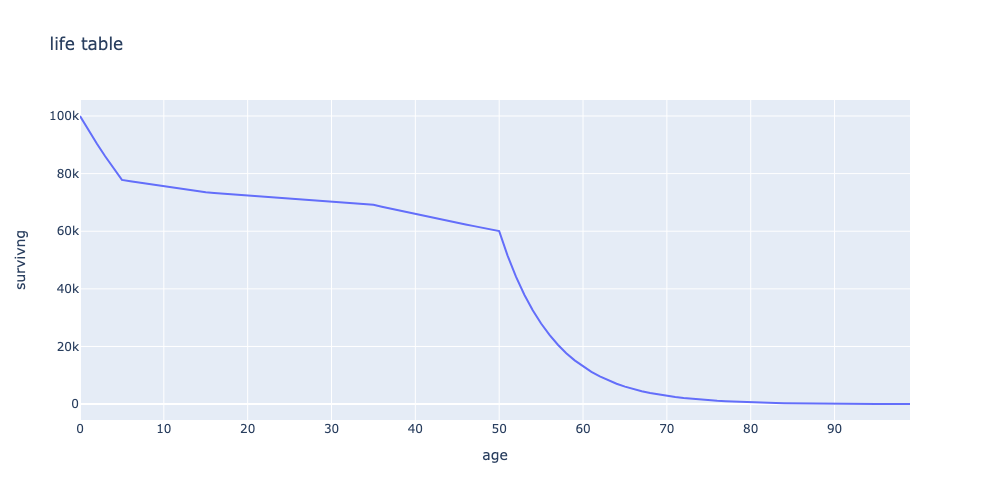

In [12]:
cohort_series.plot(labels={'value': 'survivng', 'index': 'age'}, height=500, title='life table').update_layout(showlegend=False)